In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

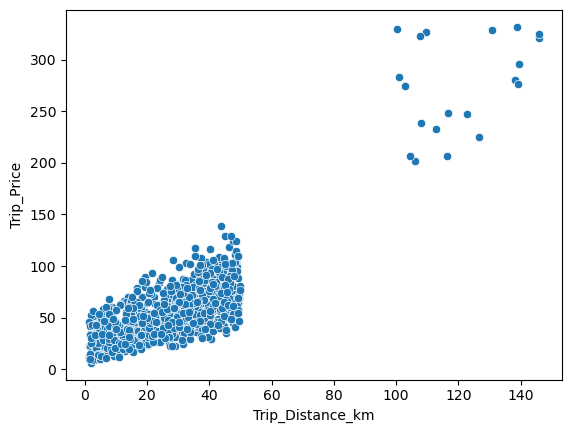

In [23]:
sns.scatterplot(x='Trip_Distance_km',y='Trip_Price',data=df)

In [25]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [27]:
df.shape

(1000, 11)

In [31]:
df['Trip_Distance_km'].count()
# it shows that there are 50 NAN values in this feature

950

In [55]:
df['Trip_Distance_km'].median()

25.83

In [37]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True) # handled all the NAN values by replacing them with the median.
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


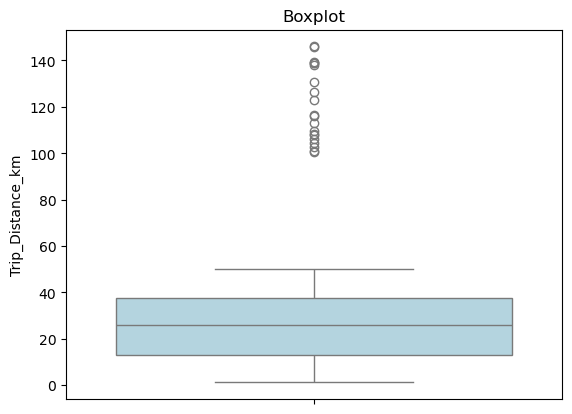

In [39]:
# Finding outliers through Box and whisker plot

sns.boxplot(data=df['Trip_Distance_km'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [45]:
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1
IQR

24.674999999999997

In [63]:
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print("Lower Range : {} \n Upper Range : {}".format(lower_range,upper_range))

Lower Range : -23.904999999999994 
 Upper Range : 74.79499999999999


In [65]:
df[df['Trip_Distance_km']<= upper_range]['Trip_Distance_km'].max()

49.99

In [51]:
df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(lambda x: 25.83 if x > upper_bound else x)
#This line of code is used to handle outliers in the Trip_Distance_km column of a DataFrame (df).
#If a trip distance is too high (above upper_range), it is considered an outlier and replaced with 25.83, a more reasonable value.

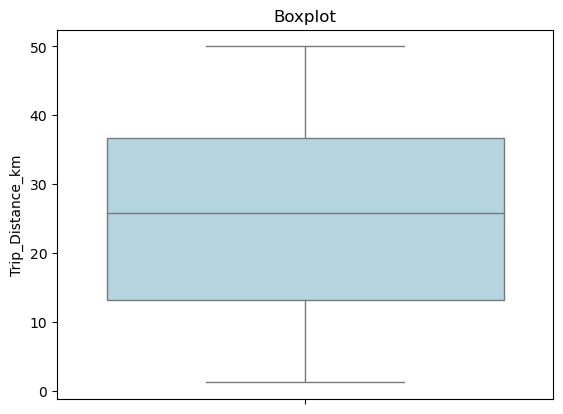

In [67]:
sns.boxplot(data=df['Trip_Distance_km'], color='lightblue')
plt.title('Boxplot')
plt.show()
# it shows that all outliers have been handled.

In [69]:
#now doing the same for the price

In [71]:
df['Trip_Price'].count()
# it shows there are 9 NAN values..

951

In [73]:
df['Trip_Price'].median()

50.07450000000001

In [75]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True) # handled all the NAN values by replacing them with the median.
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,50.0745
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


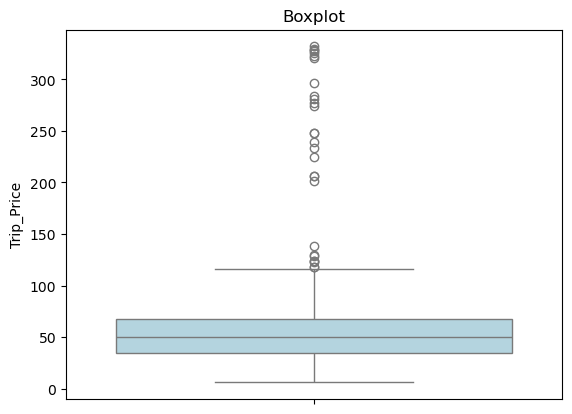

In [77]:
# Finding outliers through Box and whisker plot

sns.boxplot(data=df['Trip_Price'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [87]:
Q1 = df['Trip_Price'].quantile(0.25)
Q3 = df['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1
print("IQR is: ",IQR)
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
print("Lower Range : {} \n Upper Range : {}".format(lower_range,upper_range))

IQR is:  32.8978
Lower Range : -14.767850000000003 
 Upper Range : 116.82334999999999


In [91]:
df[df['Trip_Price'] <= upper_range]['Trip_Price'].max()

116.42059999999998

In [93]:

df['Trip_Price'] = df['Trip_Price'].apply(lambda x: 50 if x > upper_range else x)

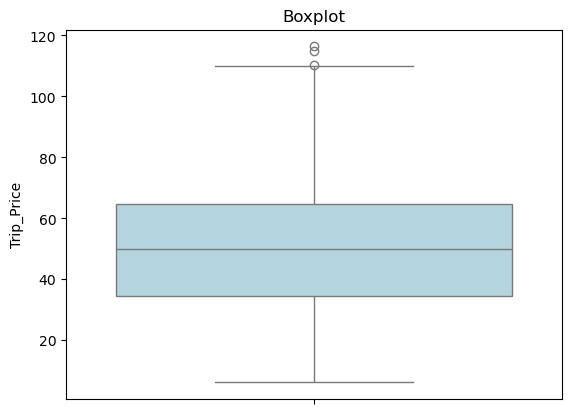

In [95]:
sns.boxplot(data=df['Trip_Price'], color='lightblue')
plt.title('Boxplot')
plt.show()


In [97]:
# now our data is ready for training and testing...

In [105]:
scaler = StandardScaler()
df[['Trip_Distance_km', 'Trip_Price']] = scaler.fit_transform(df[['Trip_Distance_km', 'Trip_Price']])
# This code is standardizing the Trip_Distance_km and Trip_Price columns using StandardScaler from sklearn.preprocessing

In [107]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [111]:
model = LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

In [117]:
mse = mean_squared_error(y_test,y_pred)

In [119]:
mse

0.5733235297451363

In [121]:
np.sqrt(mse)

0.7571813057287774

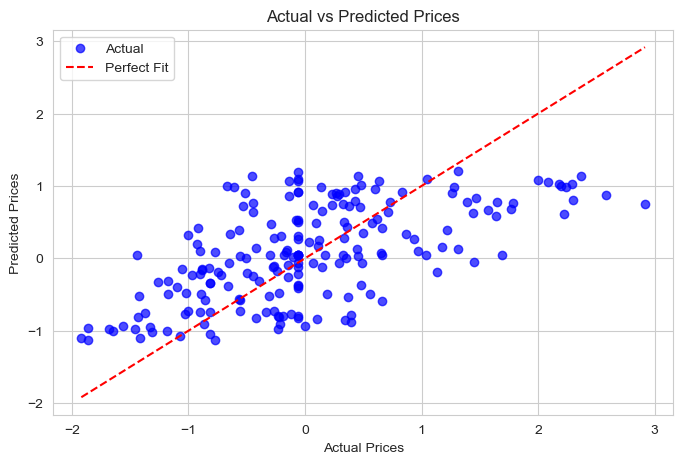

In [133]:
# Scatterplot for actual vs predicted prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual')

# Plot a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

# Labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}") #  The :.2f formatting ensures the value is rounded to 2 decimal places.
print(f"Coefficient: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: 0.01
Coefficient: 0.67
